Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №5

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [3]:
len(data[data['Dataset']==2])

167

In [4]:
len(data[data['Dataset']==1])

416

Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Посчитать корреляцию Пирсона для Direct_Bilirubin и Total_Bilirubin.

In [5]:
#H0: два образца независимы
#H1: существует зависимость между образцами.
from scipy.stats import pearsonr
corr, p_value = pearsonr(data['Direct_Bilirubin'], data['Total_Bilirubin'])
print('corr=%.3f, p_value=%.3f' % (corr, p_value))
if p_value > 0.05:
    print('Direct_Bilirubin и Total_Bilirubin независимы')
else:
    print('Direct_Bilirubin и Total_Bilirubin зависимы')

corr=0.875, p_value=0.000
Direct_Bilirubin и Total_Bilirubin зависимы


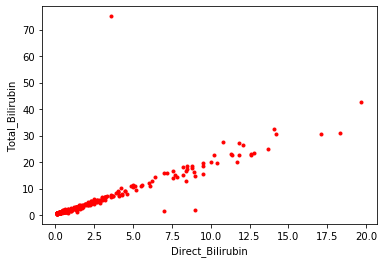

In [6]:
plt.plot(data['Direct_Bilirubin'], data['Total_Bilirubin'], 'r.')
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.show()

**Вывод:** Коэффициент корреляции между Direct_Bilirubin и Total_Bilirubin равен 0.87, а уровень значимости меньше 0.05, значит при увеличении значения показателя Direct_Bilirubin, увеличивается значение Total_Bilirubin. График это подтвержает.

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [7]:
direct_bilirubin = np.array(data['Direct_Bilirubin']).reshape(-1,1)
total_bilirubin = np.array(data['Total_Bilirubin']).reshape(-1,1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    direct_bilirubin,
    total_bilirubin,
    test_size = 0.2
)

In [9]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
predicted_y = model.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(predicted_y, y_test))
print(mean_absolute_error(predicted_y, y_test))

41.18625087969294
0.9988090921038313


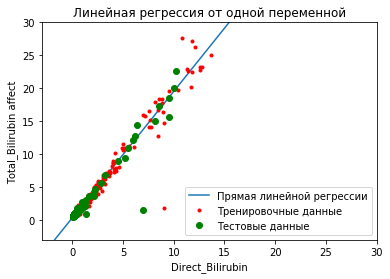

In [12]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin affect')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-50, 200, 100)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-3,30)
plt.ylim(-3,30)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Пример, как считать квантили:

In [13]:
age = data['Age']

In [14]:
print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
print("10 квантиль ряда : ", np.quantile(age, .1)) 

Q2 квантиль ряда :  45.0
Q1 квантиль ряда :  33.0
Q3 квантиль ряда :  58.0
10 квантиль ряда :  23.0


Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [15]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.100,2.0


Пример квартилей:

In [16]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Посчитать квартили для всех **колонок**. 

In [17]:
data.quantile([0.25,0.5,0.75])

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.70,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.93,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.10,2.0


Построить график histogram двух выборок по показателю Direct_Bilirubin: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

In [18]:
direct_bilirubin_gr1 = data[data['Age']<=50]['Direct_Bilirubin']
direct_bilirubin_gr1_mean = statistics.mean(direct_bilirubin_gr1)
direct_bilirubin_gr1_quantile = np.quantile(direct_bilirubin_gr1, .50)
print('Количество людей, возрастом до 50 лет:', len(direct_bilirubin_gr1))

direct_bilirubin_gr2 = data[data['Age']>50]['Direct_Bilirubin']
direct_bilirubin_gr2_mean = statistics.mean(direct_bilirubin_gr2)
direct_bilirubin_gr2_quantile = np.quantile(direct_bilirubin_gr2, .50)
print('Количество людей, возрастом после 50 лет:', len(direct_bilirubin_gr2))

Количество людей, возрастом до 50 лет: 376
Количество людей, возрастом после 50 лет: 207


Среднее значение ряда Direct_Bilirubin для людей до 50 лет:  1.4877659574468085
Среднее значение ряда Direct_Bilirubin для людей после 50 лет:  1.4830917874396135
Квантиль 0.5 ряда Direct_Bilirubin для людей до 50 лет:  0.3
Квантиль 0.5 ряда Direct_Bilirubin для людей после 50 лет:  0.4


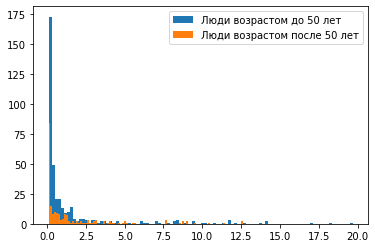

In [19]:
print("Среднее значение ряда Direct_Bilirubin для людей до 50 лет: ", direct_bilirubin_gr1_mean) 
print("Среднее значение ряда Direct_Bilirubin для людей после 50 лет: ", direct_bilirubin_gr2_mean) 
print("Квантиль 0.5 ряда Direct_Bilirubin для людей до 50 лет: ", direct_bilirubin_gr1_quantile) 
print("Квантиль 0.5 ряда Direct_Bilirubin для людей после 50 лет: ", direct_bilirubin_gr2_quantile) 
plt.hist(direct_bilirubin_gr1, 100)
plt.hist(direct_bilirubin_gr2, 100)
plt.legend(['Люди возрастом до 50 лет', 'Люди возрастом после 50 лет'])
plt.show()

**Вывод:** По гистограмме видно, что распределения имеют похожий вид, больше всего значений лежит в интервале от 0 до 5.0, это логично так так нормальный уровень прямого билирубина находится в интервале от 0 до 5,1 мкмоль/л. У людей до 50 лет больше значений параметра Direct_Bilirubin около нуля, чем у людей после 50 лет. Средние значения равны 1,5 , а медианы отличаются, у людей до 50 лет, медиана равно 0.3, после 50 лет 0.4.

Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность (все люди из выборки)? Сравнить t-критерий с табличным показателем граничного t-критерия Стьюдента. alpha = 0.05, доверительная вероятность 95%. Число степеней свободы = (количество людей больных (выборки полученной) - 1)

In [20]:
# Нулевая гипотеза - среднее значение выборки равно среднему значению генеральной совокупности.
total_bilirubin = data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_1samp(total_bilirubin, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

In [21]:
print('Количество людей больных (выборки полученной): ', len(total_bilirubin))

Количество людей больных (выборки полученной):  416


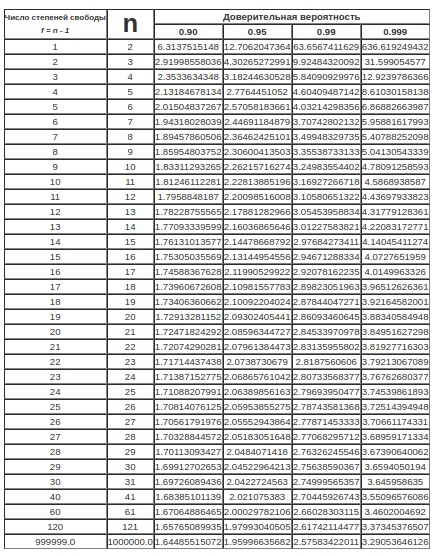

In [22]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

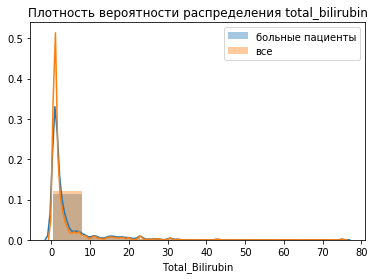

In [23]:
# график вероятности выборки и генеральной совокупности
sns.distplot(total_bilirubin,10)
sns.distplot(data['Total_Bilirubin'],10)
plt.title('Плотность вероятности распределения total_bilirubin')
plt.legend(['больные пациенты', 'все'])
plt.rcParams['figure.figsize']= 8, 8
plt.show()

**Вывод:** t-value = 2.471063305746647, мы его сравниваем с табличным значением 1.97 (или число от 1.97 до 1.95, так как нет 416 в таблице) (alpha = 0.05, число степеней свободы = 415). Так как значение t-value превышает 1.97, то мы отвергаем нулевую гипотезу (о том, что средние значения выборок равны). Значит выборка не похожа на генеральную совокупность.

Либо можно оценивать p-value. Вероятность получить такое (либо большее) значение t при условии, что проверяемая нулевая гипотеза верна, оказалась мала: p-value = 0.014, что меньше стандартной альфа ошибки 0.05. Поэтому мы отвергаем нулевую гипотезу и можем сказать (по графику тоже видно), что имеется статистическое различие между показателем крови Total_Bilirubin у больных людей и генеральной совокупности в целом.

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). В данном случае сравниваем p-value. Имеют ли данные группы схожесть?

In [24]:
total_bilirubin_sick = data[data['Dataset']==1]['Total_Bilirubin']
total_bilirubin_no_sick = data[data['Dataset']==2]['Total_Bilirubin']
t, p_value = stats.ttest_ind(total_bilirubin_sick, total_bilirubin_no_sick)
print('t=%.3f, p_value=%.3f' % (corr, p_value))

t=0.875, p_value=0.000


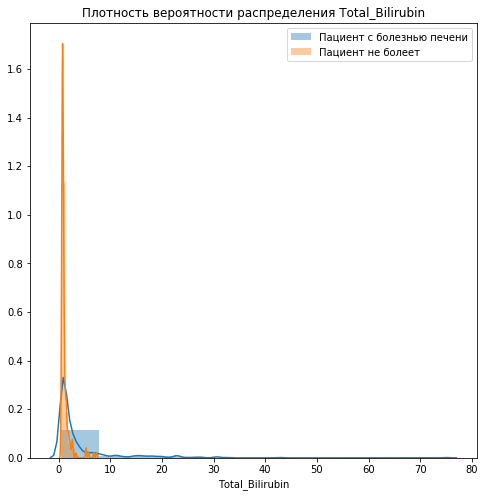

In [25]:
sns.distplot(total_bilirubin_sick, 10)
sns.distplot(total_bilirubin_no_sick, 10)
plt.title('Плотность вероятности распределения Total_Bilirubin')
plt.legend(['Пациент с болезнью печени', 'Пациент не болеет'])
plt.rcParams['figure.figsize']=8,8
plt.show()

**Вывод:** p-value равно 0.000, что намного меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу и можем сказать, что имеется статистическое различие между показателем крови Total_Bilirubin между пациентами с болезнью и без.

Посчитать статистическую значимость для **трех** выборок (по возрасту) -**тест Anova** - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [26]:
group_1 = data[(data['Age']>=1)&(data['Age']<=30)]['Dataset']

group_2 = data[(data['Age']>30)&(data['Age']<=55)]['Dataset']

group_3 = data[(data['Age']>55)]['Dataset']

stats.f_oneway(group_1, group_2, group_3)

F_onewayResult(statistic=8.942833990557906, pvalue=0.0001495741914244918)

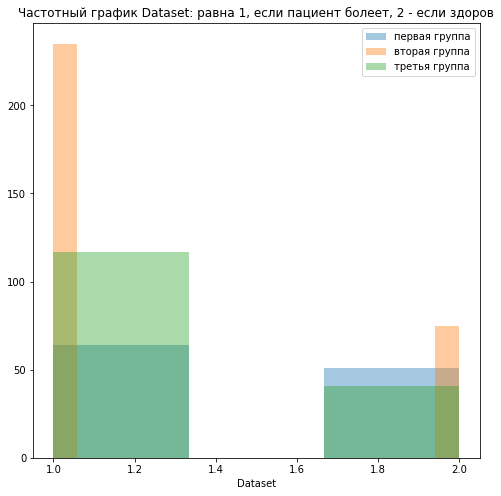

In [27]:
sns.distplot(group_1, kde = False)
sns.distplot(group_2, kde = False)
sns.distplot(group_3, kde = False)
plt.legend(['первая группа', 'вторая группа','третья группа'])
plt.title('Частотный график Dataset: равна 1, если пациент болеет, 2 - если здоров')
plt.show()
#Распределение Бернулли

**Вывод** Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий между пациентами с разным возрастом, что логично. По графику видно, что выборки отличаются.